# Análisis Predictivo para una Tienda Minorista

### Objetivo
Desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.



In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [55]:
ruta = "\\Users\\TB\\Downloads\\Ventas.csv"
df = pd.read_csv(ruta)
#df.describe()
#df.tail()
#print(df.isna())
# No datos nulos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


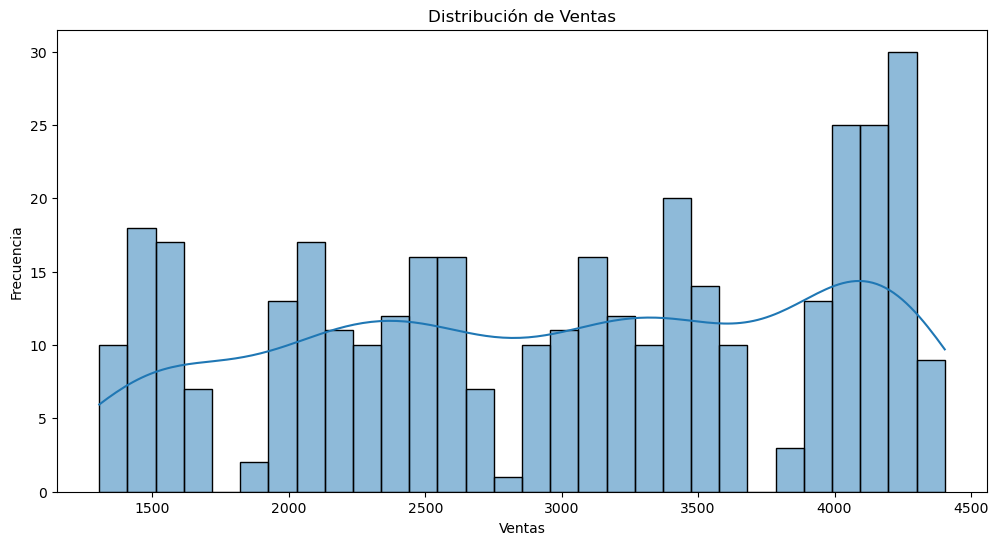

In [88]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');



C:\Users\TB\AppData\Local\Temp\ipykernel_8000\647159578.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Festivo', y='Ventas', data=df_impacto, palette="cubehelix", legend=False)


Text(0.5, 1.0, 'Ventas Promedio en Días Festivos vs. No Festivos')

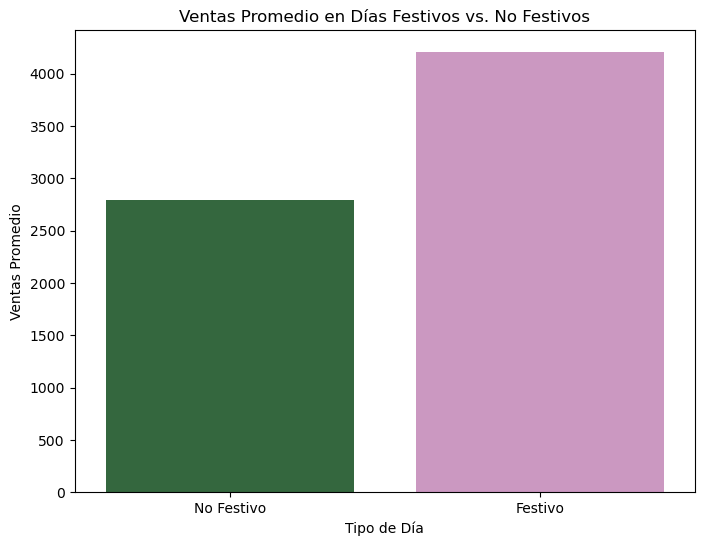

In [93]:
df_impacto = df.groupby('Festivo')['Ventas'].mean().reset_index()
df_impacto['Festivo'] = df_impacto['Festivo'].map({0: 'No Festivo', 1: 'Festivo'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Festivo', y='Ventas', data=df_impacto, palette="cubehelix", legend=False)

plt.xlabel('Tipo de Día')
plt.ylabel('Ventas Promedio')
plt.title('Ventas Promedio en Días Festivos vs. No Festivos')

C:\Users\TB\AppData\Local\Temp\ipykernel_8000\2385755104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promociones', y='Ventas', data=df_impacto_promociones, palette="husl")


Text(0.5, 1.0, 'Ventas Promedio con y Sin Promoción')

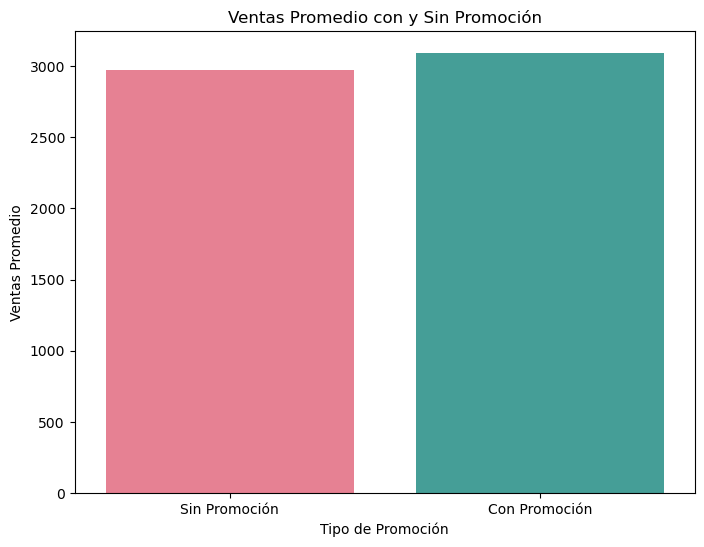

In [85]:
df_impacto_promociones = df.groupby('Promociones')['Ventas'].mean().reset_index()

df_impacto_promociones['Promociones'] = df_impacto_promociones['Promociones'].map({0: 'Sin Promoción', 1: 'Con Promoción'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Promociones', y='Ventas', data=df_impacto_promociones, palette="husl")

plt.xlabel('Tipo de Promoción')
plt.ylabel('Ventas Promedio')
plt.title('Ventas Promedio con y Sin Promoción')

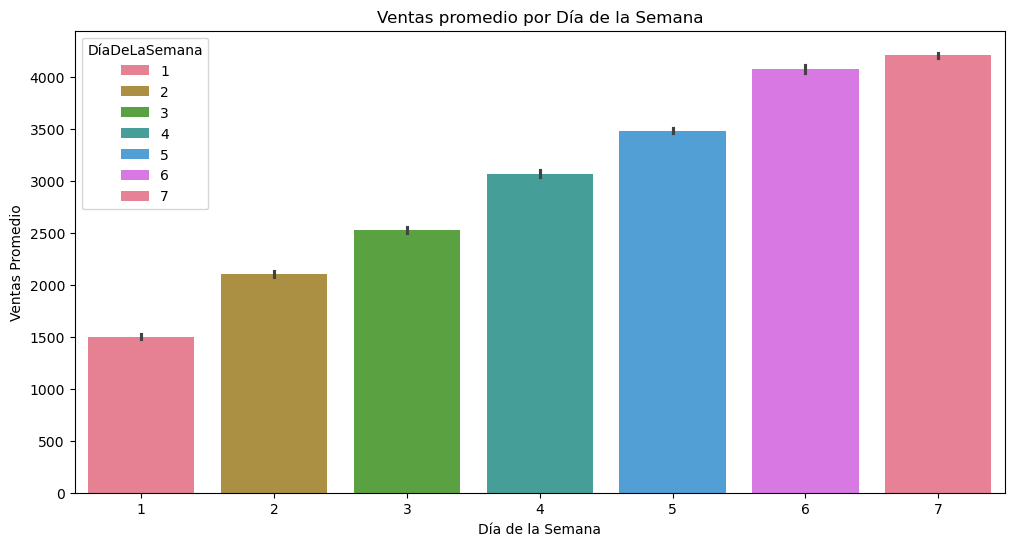

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', hue ="DíaDeLaSemana", palette="husl")
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

In [100]:
#Machine Learning

escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

# Identificar las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

# almacenar modelos
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [99]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


In [101]:
# Alojamos el modelo de Regresión Lineal en una variable
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

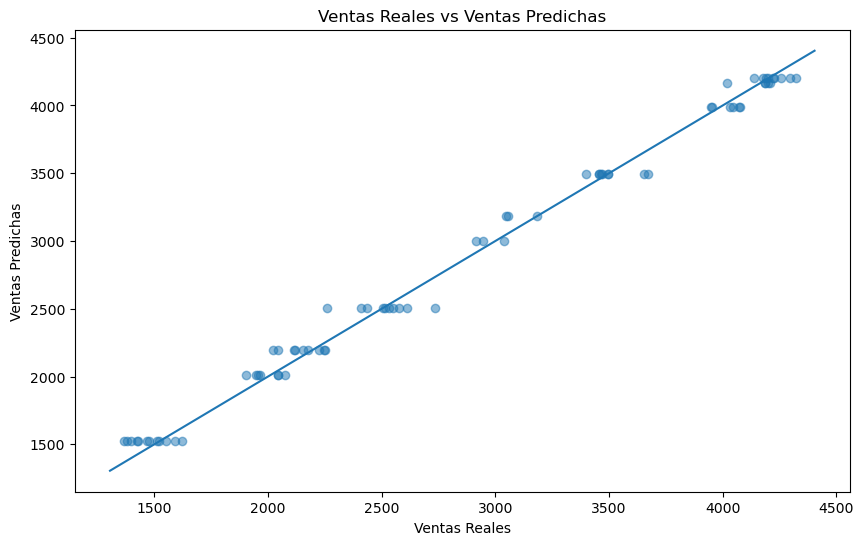

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [103]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

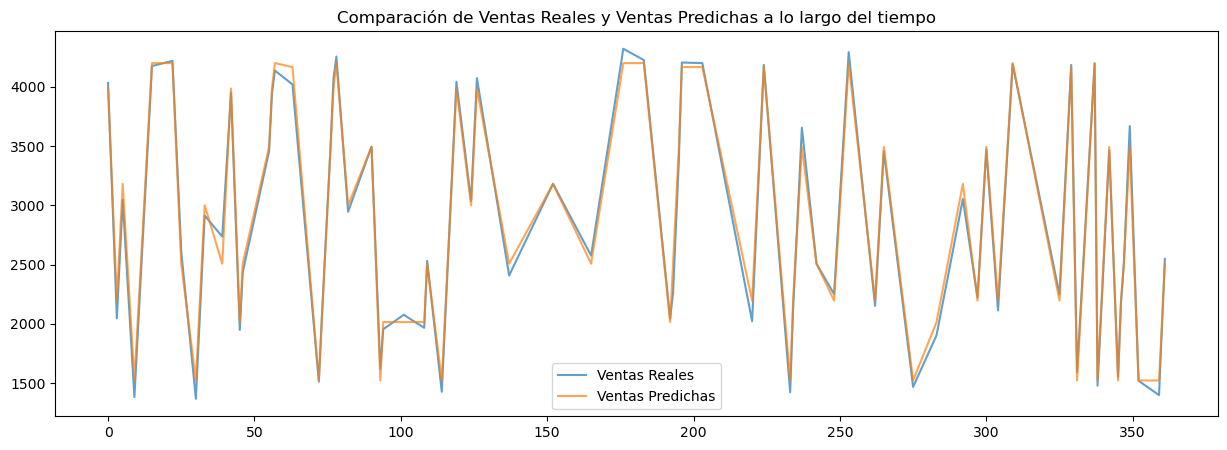

In [104]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');